In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.models as models
import torch.optim as optim
import random 
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PyQt5 import QtWidgets, QtGui, QtCore
from HW1_5_GUI import Ui_MainWindow
import sys


Bad key "text.kerning_factor" on line 4 in
C:\Users\mec-lab\Anaconda3\envs\image_processing_hw1_5\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=8,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

net = models.vgg16(pretrained=False)
net.classifier._modules['6'] = nn.Linear(4096, 10)
PATH = './cifar_net.pth'
net.load_state_dict(torch.load(PATH))

Files already downloaded and verified
Files already downloaded and verified


<All keys matched successfully>

In [3]:
def Show_Train_Image():
    random_data = random.sample(range(50000),10)
    k = 1
    plt.figure(num='astronaut',figsize=(10,10))
    for i in random_data:
        plt.subplot(5,2,k)     
        plt.title(classes[trainset.targets[i]])   
        plt.imshow(trainset.data[i,:])      
        plt.axis('off')     
        k += 1
    plt.show()

In [4]:
def Show_hyperparamters():
    img1 = cv2.imread('hyperparamters.PNG')
    cv2.imshow("hyperparamters",img1)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [5]:
def Show_Model_Structure():
    img1 = cv2.imread('5-3.PNG')
    cv2.imshow("Model Structure",img1)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [6]:
def Show_Accuracy():
    img1 = cv2.imread('Loss.PNG')
    img2 = cv2.imread('Accuracy.PNG')
    cv2.imshow("Model Loss",img1)
    cv2.imshow("Model Accuracy",img2)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [7]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
def test(number):
    dataiter = iter(testloader)
    for i in range(number + 1):
        images, labels = dataiter.next()
    plt.subplot(2,1,1)
    plt.title(classes[int(labels)])   
    imshow(torchvision.utils.make_grid(images))
    plt.axis('off') 
    
    output = net(images)
    plt.subplot(2,1,2)
    plt.bar(classes, output.detach().numpy()[0])
    
    plt.show()

In [8]:
class MainWindow(QtWidgets.QMainWindow):
    def __init__(self):
        super(MainWindow, self).__init__()
        self.ui = Ui_MainWindow()
        self.ui.setupUi(self)
        self.ui.pushButton.clicked.connect(Show_Train_Image)
        self.ui.pushButton_2.clicked.connect(Show_hyperparamters)
        self.ui.pushButton_3.clicked.connect(Show_Model_Structure)
        self.ui.pushButton_4.clicked.connect(Show_Accuracy)
        self.ui.pushButton_5.clicked.connect(self.buttonClicked)
        
    def buttonClicked(self):
        number = int(self.ui.spinBox.text())
        test(number)

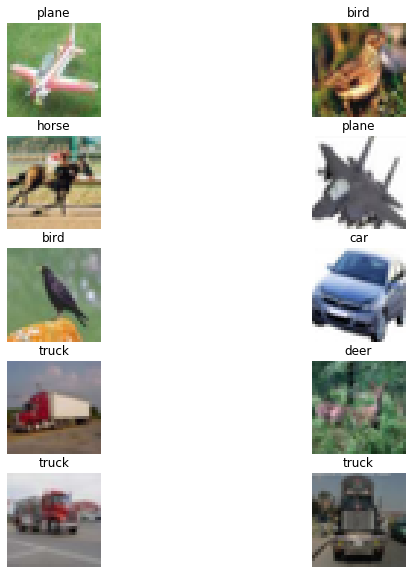

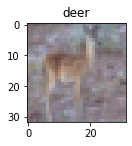

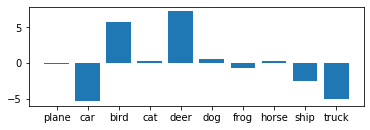

In [ ]:
if __name__ == '__main__':
    
    app = QtWidgets.QApplication([])
    window = MainWindow()
    window.show()
    sys.exit(app.exec_())